# 0.0. IMPORTS

In [96]:
#id - Unique ID for each home sold
#date - Date of the home sale
#price - Price of each home sold
#bedrooms - Number of bedrooms
#bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
#sqft_living - Square footage of the apartments interior living space
#sqft_lot - Square footage of the land space
#floors - Number of floors
#waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
#view - An index from 0 to 4 of how good the view of the property was
#condition - An index from 1 to 5 on the condition of the apartment, greater good
#grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average 
#level of construction and design, and 11-13 have a high quality level of construction and design. reater good
#sqft_above - The square footage of the interior housing space that is above ground level
#sqft_basement - The square footage of the interior housing space that is below ground level
#yr_built - The year the house was initially built
#yr_renovated - The year of the house’s last renovation
#zipcode - What zipcode area the house is in
#lat - Lattitude
#long - Longitude
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [97]:
import pandas  as pd
import numpy   as np
import seaborn as sns
from matplotlib import pyplot as plt
import inflection
import warnings

warnings.filterwarnings( 'ignore' )

## 0.1. Helper Functions

In [98]:
%matplotlib inline
%pylab inline
    
plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24
    
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False )
    
sns.set()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [99]:
df_raw = pd.read_csv( 'data/kc_house_data.csv', low_memory=False )

In [100]:
df_raw.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6235,1437580480,20140918T000000,994000.0000,5,3.2500,4260,7861,2.0000,0,0,3,10,4260,0,2005,0,98074,47.6110,-121.9920,4020,7528
10479,7454001125,20141117T000000,400000.0000,4,3.0000,2240,7035,2.0000,0,0,3,7,2240,0,1942,1993,98146,47.5124,-122.3740,1060,6300
175,7234600798,20150210T000000,425000.0000,3,2.5000,1120,1100,2.0000,0,0,3,8,820,300,2008,0,98122,47.6106,-122.3100,1590,1795
8369,8835350300,20150304T000000,536000.0000,3,2.5000,1990,7397,2.0000,0,0,3,9,1990,0,1993,0,98072,47.7703,-122.1650,2210,7397
18260,6820100035,20141112T000000,493000.0000,6,1.7500,2120,3801,1.5000,0,0,4,7,1220,900,1925,0,98115,47.6832,-122.3110,1850,4181


# 1.0. DATA DESCRIPTION

In [101]:
df1 = df_raw.copy()

## 1.1. Data Dimensions

In [102]:
print(f"Number Of Rows: {df1.shape[0]}" )
print(f"Number Of Cols: {df1.shape[1]}" )

Number Of Rows: 21613
Number Of Cols: 21


## 1.2. Data Types

In [103]:
df1['date'] = pd.to_datetime( df1['date'])
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.3. Check NA

In [104]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4. Change Types

In [105]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.5. Change Types

In [106]:
df1['price'] = df1['price'].astype( int ) 

## 1.6. Descreptive Statistical

In [107]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )

In [108]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'] )

In [109]:
pd.options.display.float_format = '{:.4f}'.format

In [110]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.0000,9900000190.0000,9899000088.0000,4580301520.8650,3904930410.0000,2876499023.4278,0.2433,-1.2605
1,price,75000.0000,7700000.0000,7625000.0000,540088.1418,450000.0000,367118.7032,4.0241,34.5855
2,bedrooms,0.0000,33.0000,33.0000,3.3708,3.0000,0.9300,1.9743,49.0637
3,bathrooms,0.0000,8.0000,8.0000,2.1148,2.2500,0.7701,0.5111,1.2799
4,sqft_living,290.0000,13540.0000,13250.0000,2079.8997,1910.0000,918.4196,1.4716,5.2431
5,sqft_lot,520.0000,1651359.0000,1650839.0000,15106.9676,7618.0000,41419.5533,13.0600,285.0778
6,floors,1.0000,3.5000,2.5000,1.4943,1.5000,0.5400,0.6162,-0.4847
7,waterfront,0.0000,1.0000,1.0000,0.0075,0.0000,0.0865,11.3851,127.6325
8,view,0.0000,4.0000,4.0000,0.2343,0.0000,0.7663,3.3957,10.8930
9,condition,1.0000,5.0000,4.0000,3.4094,3.0000,0.6507,1.0328,0.5258


In [111]:
pd.reset_option('^display.', silent=True)

<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

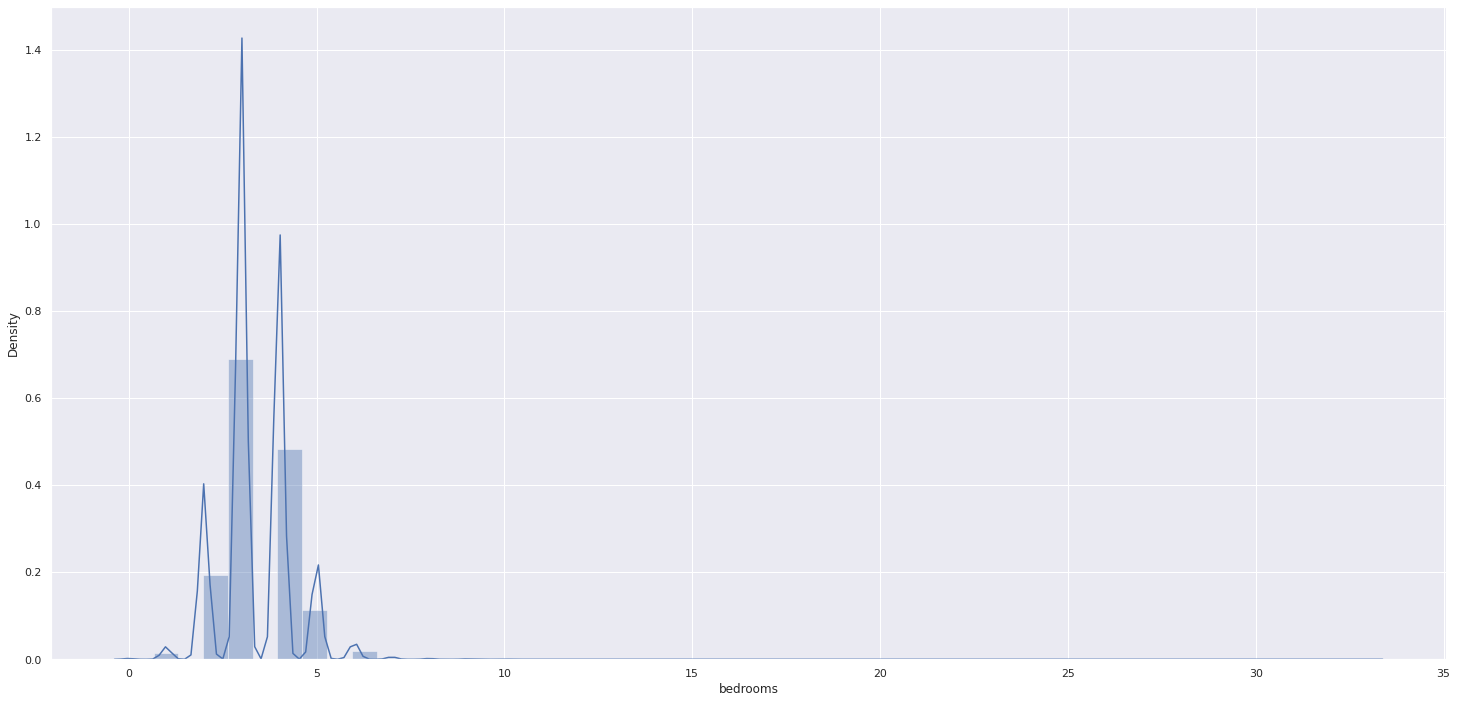

In [113]:
sns.distplot( df1['bedrooms'] )

In [118]:
df1.loc[df1['bedrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,2015-02-05,380000,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,2014-06-24,1295650,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,2015-02-18,320000,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [119]:
df1.loc[df1['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,2015-02-17,75000,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,2015-02-05,380000,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,2014-11-04,280000,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,2014-06-24,1295650,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,2015-04-29,355000,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,2014-09-18,484000,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,2015-04-13,139950,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,2014-09-26,142000,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
